## CS156A Homework 2
## Wilson Duan

### Problem 1.
We know that $\epsilon = \sqrt{\frac{8}{N}\ln{\frac{4m_H(2N)}{\delta}}}$.
Since we are using the simple approximate bound $N^{d_{vc}}$, we have $\epsilon = \sqrt{\frac{8}{N}\ln{\frac{4(2N)^{d_{vc}}}{\delta}}}$. We are given that $d_{vc} = 10$, and since we are dealing with 95% confidence, we know that $\delta = 0.05$. Plugging in, we get

$\epsilon = \sqrt{\frac{8}{N}\ln{\frac{4(2N)^{10}}{0.05}}}$.

We want to choose the $N$ that makes $\epsilon$ closest to 0.05. Plugging in each answer choice, we find that choosing $N = 460000$ gives us $\epsilon = 0.0496$, which is the closest to 0.05, so our answer is **d)**.

### Problem 2.


In [91]:
# imports
import math
import random
import scipy.optimize
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

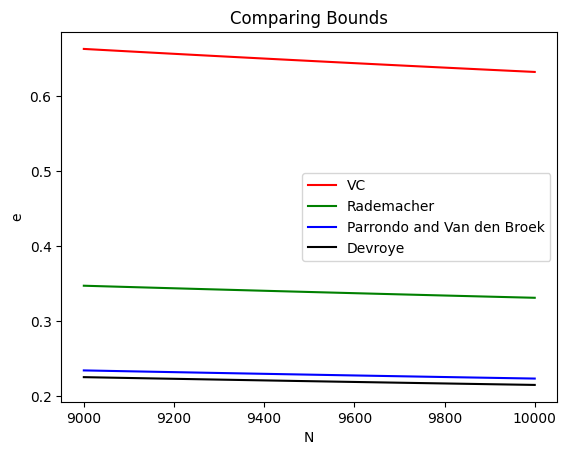

In [88]:
d_vc = 50
delta = 0.05
N_range = np.linspace(9000, 10000, 100)

def vc(N):
    return math.sqrt(8/N * math.log(4 * (2 * N) ** d_vc / delta))

def rademacher(N):
    return math.sqrt(2 * math.log(2 * N * N ** d_vc) / N) + math.sqrt(2/N * math.log(1/delta)) + 1/N

def parrondo(N):
    def parrondo_root(e):
        return math.sqrt(1/N * (2 * e + math.log(6 * (2 * N) ** d_vc / delta))) - e
    return scipy.optimize.brentq(parrondo_root, 0, 10)

def devroye(N):
    def devroye_root(e):
        return math.sqrt(1/(2*N) * (4 * e * (1 + e) + d_vc * math.log(N ** 2) + math.log(4 / delta))) - e
    return scipy.optimize.brentq(devroye_root, 0, 10)

plt.plot(N_range, [vc(N) for N in N_range], 'red', label="VC")
plt.plot(N_range, [rademacher(N) for N in N_range], 'green', label="Rademacher")
plt.plot(N_range, [parrondo(N) for N in N_range], 'blue', label="Parrondo and Van den Broek")
plt.plot(N_range, [devroye(N) for N in N_range], 'black', label="Devroye")
plt.title("Comparing Bounds")
plt.xlabel("N")
plt.ylabel("e")
plt.legend()
plt.show()


It is evident through the plot that Devroye has the smallest bound on the generalization error for $N = 10000$, so the answer is **d)**.

### Problem 3.

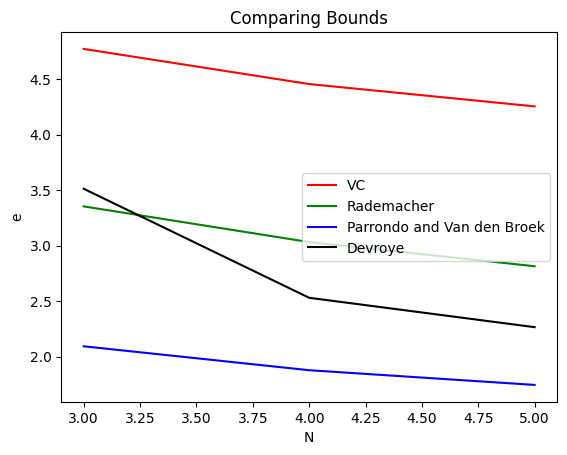

In [89]:
N_range = list(range(3, 6))

def vc(N):
    return math.sqrt(8/N * math.log(4 * 2 ** (2 * N) / delta))

def rademacher(N):
    return math.sqrt(2 * math.log(2 * N * 2 ** N) / N) + math.sqrt(2/N * math.log(1/delta)) + 1/N

def parrondo(N):
    def parrondo_root(e):
        return math.sqrt(1/N * (2 * e + math.log(6 * 2 ** (2 * N) / delta))) - e
    return scipy.optimize.brentq(parrondo_root, 0, 100)

def devroye(N):
    def devroye_root(e):
        return math.sqrt(1/(2*N) * (4 * e * (1 + e) + N ** 2 * math.log(2) + math.log(4 / delta))) - e
    return scipy.optimize.brentq(devroye_root, 0, 100)

plt.plot(N_range, [vc(N) for N in N_range], 'red', label="VC")
plt.plot(N_range, [rademacher(N) for N in N_range], 'green', label="Rademacher")
plt.plot(N_range, [parrondo(N) for N in N_range], 'blue', label="Parrondo and Van den Broek")
plt.plot(N_range, [devroye(N) for N in N_range], 'black', label="Devroye")
plt.title("Comparing Bounds")
plt.xlabel("N")
plt.ylabel("e")
plt.legend()
plt.show()

From the plot, it is evident that Parrondo and Van den Broek has the smallest bound on the generalization error for $N = 5$, so the answer is **c)**.

### Problem 4.

In [155]:
N_samples = 10000

def f(x):
    return math.sin(math.pi * x)

avg_slope = 0
slopes = []
for i in range(N_samples):
    X = [random.random() * 2 - 1, random.random() * 2 - 1]
    y = [f(X[0]), f(X[1])]
    X = np.array(X).reshape(-1, 1)
    y = np.array(y).reshape(-1, 1)

    reg = LinearRegression(fit_intercept=False).fit(X, y)
    avg_slope += reg.coef_[0][0]
    slopes.append(reg.coef_[0][0])

avg_slope /= N_samples
print("Average a: {:.2f}".format(avg_slope))

Average a: 1.42


The average a obtained after 10000 simulations was 1.42, which does not match any of the answer choices. As a result, the answer is **e)**.

### Problem 5.

In [152]:
bias = 0
N_test = 1000
for i in range(N_test):
    x = random.random() * 2 - 1
    y = f(x)
    pred = avg_slope * x
    bias += (y - pred) ** 2
bias /= N_test

print("Bias: {:.2f}".format(bias))

Bias: 0.27


The calculated bias of 0.27 is closest to answer **b)** 0.3

### Problem 6.

In [154]:
variance = 0
for i in range(N_test):
    x = random.random() * 2 - 1
    for slope in slopes:
        variance += (avg_slope * x - slope * x) ** 2

variance /= N_test * len(slopes)
print("Variance: {:.2f}".format(variance))

Variance: 0.24


The calculated variance of 0.24 is closest to answer **a)** 0.2

### Problem 7.

In [165]:
# train hypothesis a
avg_b = 0
bs = []
for i in range(N_samples):
    X = [random.random() * 2 - 1, random.random() * 2 - 1]
    y = [f(X[0]), f(X[1])]

    b = (y[0] + y[1]) / 2
    bs.append(b)
    avg_b += b
avg_b /= N_samples

# test hypothesis a
bias = 0
variance = 0
for i in range(N_test):
    x = random.random() * 2 - 1
    y = f(x)
    bias += (y - avg_b) ** 2
    for b in bs:
        variance += (b - avg_b) ** 2
bias /= N_test
variance /= N_test * len(bs)
error = bias + variance
print("Expected out of sample error for hypothesis a: {:.2f}".format(error))

Expected out of sample error for hypothesis a: 0.75


In [171]:
# train hypothesis c
avg_a = 0
avg_b = 0
a_s = []
bs = []
for i in range(N_samples):
    X = [random.random() * 2 - 1, random.random() * 2 - 1]
    y = [f(X[0]), f(X[1])]

    X = np.array(X).reshape(-1, 1)
    y = np.array(y).reshape(-1, 1)

    reg = LinearRegression().fit(X, y)
    avg_a += reg.coef_[0][0]
    avg_b += reg.intercept_[0]
    a_s.append(reg.coef_[0][0])
    bs.append(reg.intercept_[0])
avg_a /= N_samples
avg_b /= N_samples

# test hypothesis c
bias = 0
variance = 0
for i in range(N_test):
    x = random.random() * 2 - 1
    y = f(x)
    bias += (y - (avg_a * x + avg_b)) ** 2
    for a, b in zip(a_s, bs):
        variance += ((avg_a * x + avg_b) - (a * x + b)) ** 2
bias /= N_test
variance /= N_test * len(bs)
error = bias + variance
print("Expected out of sample error for hypothesis a: {:.2f}".format(error))

Expected out of sample error for hypothesis a: 1.86


In [173]:
# train hypothesis d
avg_a = 0
a_s = []
for i in range(N_samples):
    X = [random.random() * 2 - 1, random.random() * 2 - 1]
    y = [f(X[0]), f(X[1])]

    X = np.array(X).reshape(-1, 1) ** 2
    y = np.array(y).reshape(-1, 1)

    reg = LinearRegression(fit_intercept=False).fit(X, y)
    avg_a += reg.coef_[0][0]
    a_s.append(reg.coef_[0][0])
avg_a /= N_samples

# test hypothesis d
bias = 0
variance = 0
for i in range(N_test):
    x = random.random() * 2 - 1
    y = f(x)
    bias += (y - (avg_a * x ** 2)) ** 2
    for a in a_s:
        variance += ((avg_a ** x ** 2) - (a * x ** 2)) ** 2
bias /= N_test
variance /= N_test * len(bs)
error = bias + variance
print("Expected out of sample error for hypothesis a: {:.2f}".format(error))

Expected out of sample error for hypothesis a: 21.18


In [174]:
# train hypothesis e
avg_a = 0
avg_b = 0
a_s = []
bs = []
for i in range(N_samples):
    X = [random.random() * 2 - 1, random.random() * 2 - 1]
    y = [f(X[0]), f(X[1])]

    X = np.array(X).reshape(-1, 1) ** 2
    y = np.array(y).reshape(-1, 1)

    reg = LinearRegression().fit(X, y)
    avg_a += reg.coef_[0][0]
    avg_b += reg.intercept_[0]
    a_s.append(reg.coef_[0][0])
    bs.append(reg.intercept_[0])
avg_a /= N_samples
avg_b /= N_samples

# test hypothesis e
bias = 0
variance = 0
for i in range(N_test):
    x = random.random() * 2 - 1
    y = f(x)
    bias += (y - (avg_a * x ** 2 + avg_b)) ** 2
    for a, b in zip(a_s, bs):
        variance += ((avg_a * x ** 2 + avg_b) - (a * x ** 2 + b)) ** 2
bias /= N_test
variance /= N_test * len(bs)
error = bias + variance
print("Expected out of sample error for hypothesis a: {:.2f}".format(error))

Expected out of sample error for hypothesis a: 7760.74


From the code cells above as well as our answer to problems 4-6, we know that learning model **b)** has the lowest error with an error of 0.27 + 0.24 = 0.51, so the answer is **b)**.

### Problem 8.
$m_H(N + 1) = 2m_H(N) - {N\choose q}$

Since ${N\choose q} = 0$ when q > N, we know that $m_H(N + 1) = 2m_H(N) - {N\choose q} = 2^{N+1}$ when q > N. 

Plugging in q, we get

$m_H(q) = 2m_H(q-1) - {q-1\choose q} = 2^q$

Plugging in q + 1, we get

$m_H(q + 1) = 2m_H(q) - {q\choose q} = 2^{q+1} - 1$

Therefore, it is evident that the breakpoint is at q + 1 and the VC dimension is q, making the answer **c)**.


### Problem 9.
Taking the intersection of our hypothesis sets imposes a constraint: the number of points of this intersection cannot exceed the size of the hypothesis set with the minimum VC dimension. This forms the upper bound of the VC dimension of the intersection. We also know that the lower bound of the VC dimension is zero in the case of dealing with empty sets, making the answer **b)**.

### Problem 10.
Since the union of hypothesis sets contains the elements of the hypothesis with the maximum VC dimension, we know that the maximum VC dimension of the set of hypothesis sets is a valid lower bound.

We can look at the answer choices to evaluate each upper bound.

In choice **a)**, we have the upper bound $\sum{k=1}^{K} d_{vc}(H_k)$. It is not a valid upper bound because of the following counterexample: 
Let $H_1$ be a hypothesis that takes in points in the range [0, 1] and classifies them all as +1. Let $H_2$ be a hypothesis that takes in points in the same range and classifies them all as -1. The VC dimension for $H_1$ is zero because it cannot shatter points with -1 classification. The VC dimension for $H_2$ is also zero because it cannot shatter points with a +1 classification. When we take the union of $H_1$ and $H_2$, we can shatter 1 point because we can generate all dichotomies for N = 1. It cannot shatter 2 points, so the VC dimension is 1. This VC dimension is greater than the sum of the VC dimension of $H_1$ and $H_2$, disproving this upper bound. The upper bound $K - 1 + \sum{k=1}^{K} d_{vc}(H_k)$ is valid for this counterexample, making it a reasonable upper bound. As a result, since choice e has the tightest lower and upper bound that are also valid, the answer is choice **e)**.